<a href="https://colab.research.google.com/github/ZehanQin/ECON5200-Applied-Data-Analytics-in-Econ/blob/main/Lab%202/%5BLab_2%5D%20Deflating%20History%20with%20FRED.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install fredapi

In [2]:
import pandas as pd
from fredapi import Fred

In [3]:
fred = Fred(api_key='*')

In [4]:
wages = fred.get_series('AHETPI')
cpi = fred.get_series('CPIAUCSL')
df = pd.DataFrame({'Nominal_Wage': wages, 'CPI': cpi})
df = df.dropna()
print(df.head())
print(df.tail())

            Nominal_Wage    CPI
1964-01-01          2.50  30.94
1964-02-01          2.50  30.91
1964-03-01          2.51  30.94
1964-04-01          2.52  30.95
1964-05-01          2.52  30.98
            Nominal_Wage      CPI
2025-07-01         31.35  322.132
2025-08-01         31.45  323.364
2025-09-01         31.52  324.368
2025-11-01         31.73  325.031
2025-12-01         31.76  326.030


In [7]:
def get_real_wage(nominal_col,cpi_col):
  cpi_today = cpi_col.iloc[-1]
  real_col = (nominal_col/cpi_col)*cpi_today
  return real_col

df['Real_Wage']=get_real_wage(df["Nominal_Wage"],df['CPI'])
print(df.tail())

            Nominal_Wage      CPI  Real_Wage
2025-07-01         31.35  322.132  31.729355
2025-08-01         31.45  323.364  31.709292
2025-09-01         31.52  324.368  31.681502
2025-11-01         31.73  325.031  31.827524
2025-12-01         31.76  326.030  31.760000


AI Tasks:

In [8]:
import matplotlib.pyplot as plt

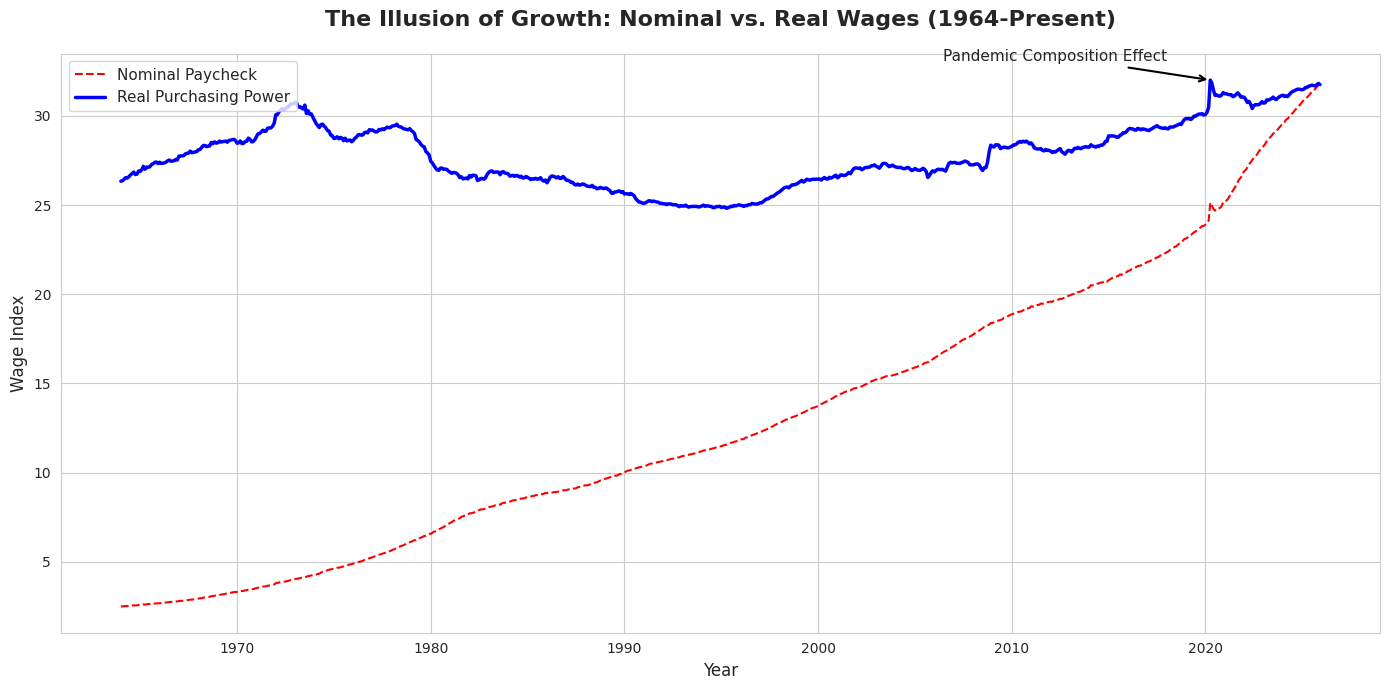

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style and figure size
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(14, 7))

# Plot both wage series
ax.plot(df.index, df['Nominal_Wage'], linestyle='--', color='red',
        label='Nominal Paycheck', linewidth=1.5)
ax.plot(df.index, df['Real_Wage'], linestyle='-', color='blue',
        label='Real Purchasing Power', linewidth=2.5)

# Add title and labels
ax.set_title("The Illusion of Growth: Nominal vs. Real Wages (1964-Present)",
             fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel("Year", fontsize=12)
ax.set_ylabel("Wage Index", fontsize=12)

# Add annotation arrow pointing to 2020 spike
# Find the 2020 Real_Wage value for precise positioning
spike_date = pd.Timestamp('2020-04-01')
spike_value = df.loc[spike_date, 'Real_Wage']

ax.annotate('Pandemic Composition Effect',
            xy=(spike_date, spike_value),
            xytext=(spike_date - pd.DateOffset(years=8), spike_value + (df['Real_Wage'].max() - df['Real_Wage'].min()) * 0.15),
            fontsize=11,
            ha='center',
            arrowprops=dict(arrowstyle='->', color='black', lw=1.5))

# Add legend
ax.legend(loc='upper left', fontsize=11, frameon=True)

# Improve layout
plt.tight_layout()
plt.show()

Task Ans: The blue line looks flatter comparing to the red line. This is because the redline did not consider the intervention of inflation factors, so it grows in a steady pace.

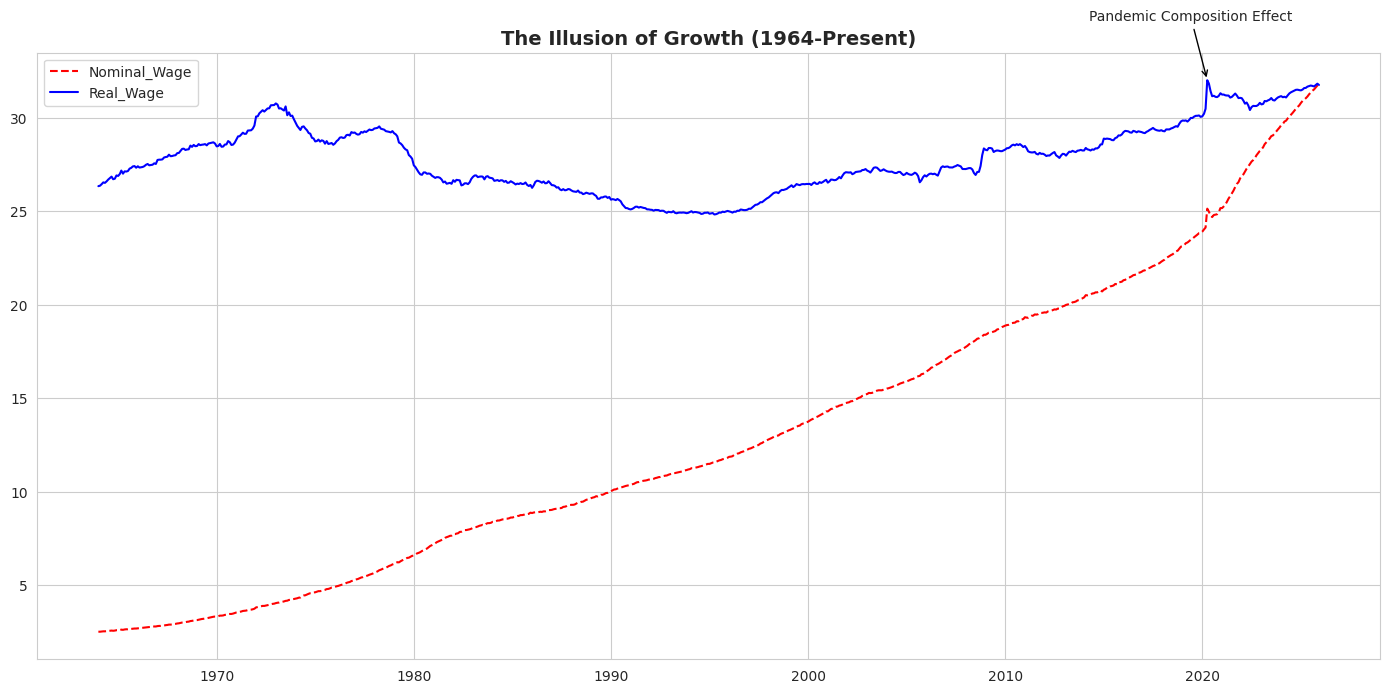

In [10]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(14, 7))

# Plot both wage series
ax.plot(df.index, df['Nominal_Wage'], linestyle='--', color='red', label='Nominal_Wage')
ax.plot(df.index, df['Real_Wage'], linestyle='-', color='blue', label='Real_Wage')

# Add title
ax.set_title("The Illusion of Growth (1964-Present)", fontsize=14, fontweight='bold')

# Annotate 2020 spike
spike_date = pd.Timestamp('2020-04-01')
spike_value = df.loc[spike_date, 'Real_Wage']

ax.annotate('Pandemic Composition Effect',
            xy=(spike_date, spike_value),
            xytext=(spike_date - pd.DateOffset(years=6), spike_value * 1.1),
            fontsize=10,
            arrowprops=dict(arrowstyle='->', color='black'))

ax.legend()
plt.tight_layout()
plt.show()

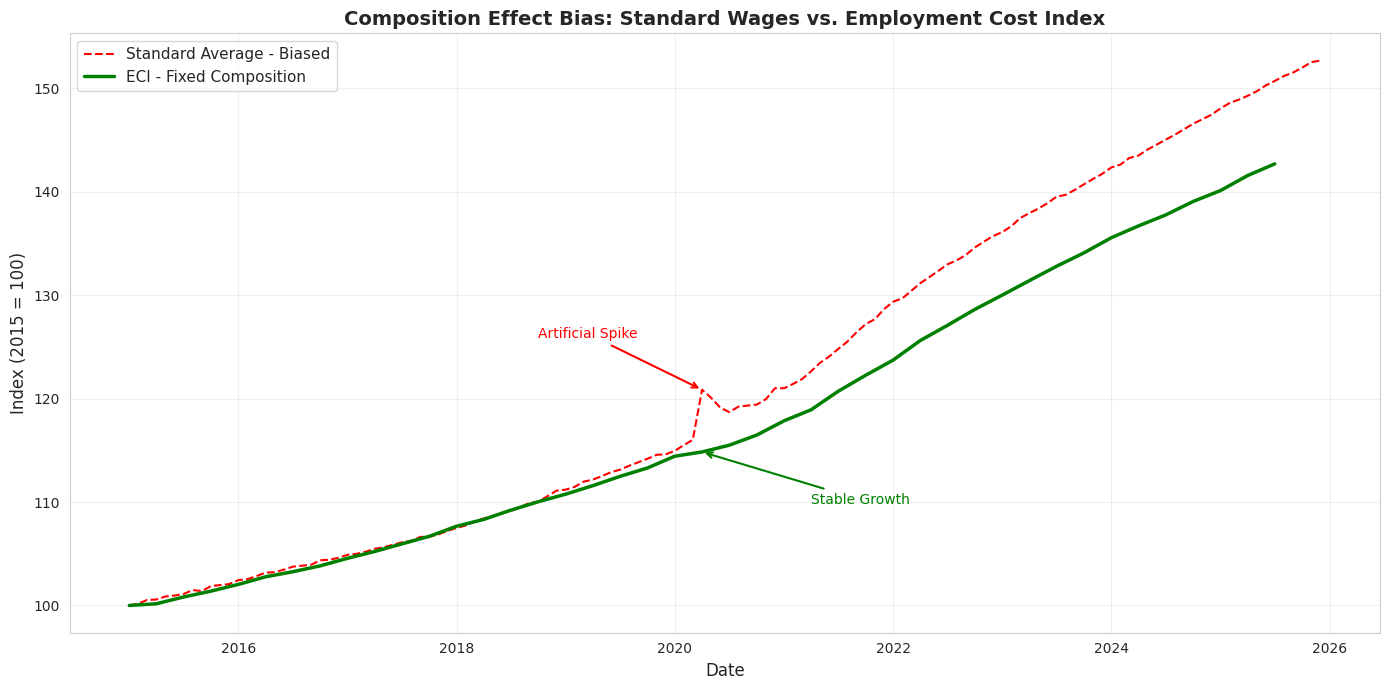

In [11]:
import matplotlib.pyplot as plt
import pandas as pd

# 1. Fetch the Employment Cost Index
eci = fred.get_series('ECIWAG')

# 2. Filter both series from 2015 onwards
start_date = '2015-01-01'
wages_filtered = wages[wages.index >= start_date]
eci_filtered = eci[eci.index >= start_date]

# 3. Rebase both series to 100 (first value = 100)
wages_rebased = (wages_filtered / wages_filtered.iloc[0]) * 100
eci_rebased = (eci_filtered / eci_filtered.iloc[0]) * 100

# 4. Plot both series
fig, ax = plt.subplots(figsize=(14, 7))

ax.plot(wages_rebased.index, wages_rebased, linestyle='--', color='red',
        linewidth=1.5, label='Standard Average - Biased')
ax.plot(eci_rebased.index, eci_rebased, linestyle='-', color='green',
        linewidth=2.5, label='ECI - Fixed Composition')

ax.set_title("Composition Effect Bias: Standard Wages vs. Employment Cost Index",
             fontsize=14, fontweight='bold')
ax.set_xlabel("Date", fontsize=12)
ax.set_ylabel("Index (2015 = 100)", fontsize=12)

# 5. Annotate the 2020 divergence
spike_date = pd.Timestamp('2020-04-01')

# Annotation for the artificial spike in standard wages
wages_spike = wages_rebased.loc[wages_rebased.index >= '2020-03-01'].iloc[:3].max()
ax.annotate('Artificial Spike',
            xy=(spike_date, wages_spike),
            xytext=(spike_date - pd.DateOffset(months=18), wages_spike + 5),
            fontsize=10, color='red',
            arrowprops=dict(arrowstyle='->', color='red', lw=1.5))

# Annotation for stable growth in ECI
eci_2020 = eci_rebased.loc[eci_rebased.index.asof(spike_date)]
ax.annotate('Stable Growth',
            xy=(spike_date, eci_2020),
            xytext=(spike_date + pd.DateOffset(months=12), eci_2020 - 5),
            fontsize=10, color='green',
            arrowprops=dict(arrowstyle='->', color='green', lw=1.5))

ax.legend(loc='upper left', fontsize=11)
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()